# Adam Trentowski - 162602 - Machine Learning
## lab_02
## Library Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import svm
import numpy as np
from sklearn.naive_bayes import GaussianNB
import plotly.graph_objects as go
from dash import Dash, dcc, html, Input, Output
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
%matplotlib inline

# 1. Linear Regression
## Data loading

In [2]:
wine_data = pd.read_csv('wine.csv')

In [3]:
wine_data.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Data split ( 70% : 30% )

In [4]:
train_data, test_data = train_test_split(wine_data, test_size=0.3, random_state=7)

## Separation of independent variables (X) and dependent variable (Y)

In [5]:
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1]

In [6]:
test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1]

## Creation and training a linear regression model

In [7]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

## Model coefficients

In [8]:
print("Coefficient of model:", model.coef_)

Coefficient of model: [-1.23639393e-01  1.95290321e-02 -1.51818431e-01  5.39014384e-02
 -7.81441247e-04  1.04780050e-01 -3.54226372e-01 -5.96793464e-01
 -8.69947940e-02  8.50779141e-02 -2.17506657e-01 -2.19643190e-01
 -5.55266492e-04]


In [9]:
print("Intercept of model):", model.intercept_)

Intercept of model): 4.446537686341291


## Prediction on training and test sets

In [10]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [11]:
print("Predicts (train): ", predict_train)

Predicts (train):  [2.05987805 2.01364783 2.08875605 1.07458972 2.80422656 0.88501062
 3.07791256 1.4569683  2.90301603 1.1236965  3.03062118 1.96753076
 1.88319303 1.9975679  0.98856614 1.85657848 1.4347571  0.80389607
 2.95474153 0.99128421 2.92428393 1.98768254 2.22774877 3.04929717
 2.25850489 0.88809858 1.73946825 1.73057303 1.76888273 1.93561329
 1.13315118 0.87687911 0.97687415 2.04721913 2.14212817 2.95834811
 2.07568034 1.2156004  1.95783936 2.58754255 1.56809235 2.19876319
 1.26909755 2.91272317 2.28253728 1.17081658 1.03641409 1.01896244
 0.3958699  2.18023597 1.97384671 1.13926437 1.88137038 1.34018817
 1.02789288 1.10204691 1.07759143 1.02078075 3.11448852 2.99329431
 1.47813739 0.67289769 1.01691161 2.82250925 1.01096604 1.13323476
 1.53986725 2.53806065 1.69738251 1.99623769 1.050338   1.20255683
 2.72575177 1.078692   2.46426054 3.02429058 3.0873531  1.86706954
 3.09076563 1.75114812 2.53580307 2.44992014 1.32119748 0.76171791
 2.888622   1.71539072 2.88117491 1.7310176

In [12]:
print("Predicts (test): ", predict_test)

Predicts (test):  [3.03087985 1.21189589 3.11016654 3.27421521 1.83403317 2.8811608
 1.93310778 1.03617427 1.68960822 2.48629876 0.81905106 1.80797968
 2.56588285 1.85102614 1.70065    2.06487088 1.41821331 3.06861062
 0.85892915 1.327699   1.94622622 1.39721401 2.09119539 2.4262726
 0.30316238 3.081598   2.12588628 2.8204082  3.02877977 2.60453551
 1.99861138 1.19619652 2.65725385 1.84536523 1.64423416 1.56647922
 2.58843655 2.80079268 1.12751068 2.91019165 1.34311227 1.35045987
 2.88430542 2.66255829 1.78899318 1.42247238 1.04498256 1.80960844
 2.07102212 1.61510867 1.68058343 1.32112209 0.76734295 1.19784482]


## Calculation of RMSE

In [13]:
rmse_train = mean_squared_error(train_y, predict_train) ** 0.5
rmse_test = mean_squared_error(test_y, predict_test) ** 0.5

In [14]:
print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)

RMSE (train): 0.23619215005996844
RMSE (test): 0.30745533550152543


## Visualization

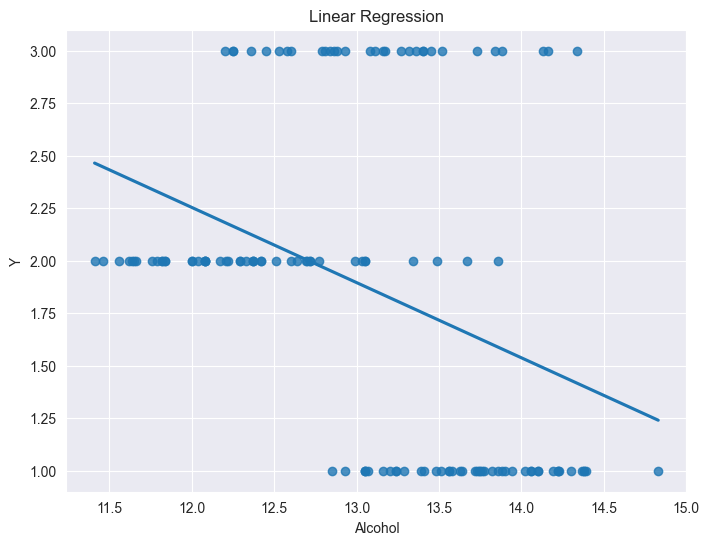

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x=train_x.iloc[:, 0], y=train_y, ci=None)
plt.xlabel("Alcohol")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.show()

# 2. Logistic Regression
## Data loading

In [16]:
data = pd.read_csv("Vlagun_Phys_Years3.csv")

In [17]:
data.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Separation of independent variables (X) and dependent variable (Y)

In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Data split ( 70% : 30% )

In [19]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

## Creation and training a logistic regression model

In [20]:
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

## Model coefficients

In [21]:
print("Coefficient of model:", model.coef_)

Coefficient of model: [[-1.11390972 -0.51745006  0.66995943  0.14190608 -1.40851679 -0.90323395
   0.8791693  -0.14860583]]


In [22]:
print("Intercept of model):", model.intercept_)

Intercept of model): [1.29322008]


## Prediction on training and test sets

In [23]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

## Calculation of model accuracy

In [24]:
accuracy_train = accuracy_score(train_y, predict_train)
accuracy_test = accuracy_score(test_y, predict_test)

In [25]:
print("Accuracy on training set:", accuracy_train)

Accuracy on training set: 0.9880952380952381


In [26]:
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.9444444444444444


## Visualization

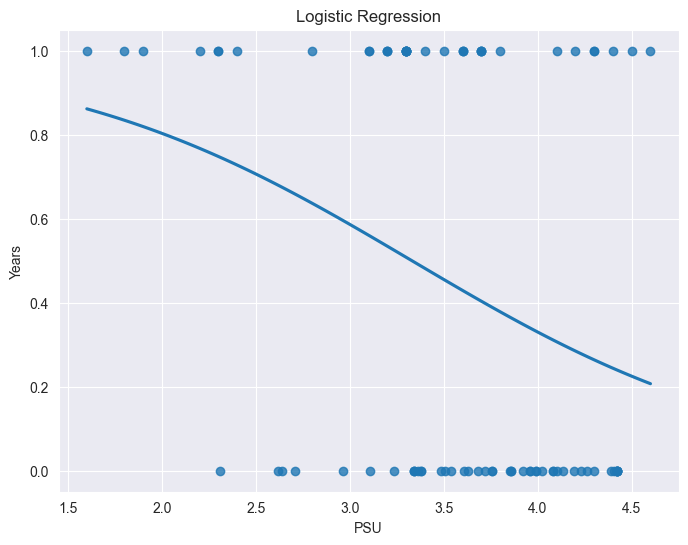

In [27]:
plt.figure(figsize=(8, 6))
sns.regplot(x=train_x[:, 0], y=train_y, logistic=True, ci=None)
plt.xlabel("PSU")
plt.ylabel("Years")
plt.title("Logistic Regression")
plt.show()

# 3. Support Vector Machine
## Data loading

In [28]:
data = pd.read_csv("Vlagun_Phys_Years3.csv")

In [29]:
data.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Separation of independent variables (X) and dependent variable (Y)

In [30]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Data split ( 70% : 30% )

In [31]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

## Testing models with different SVM kernels

In [32]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

In [33]:
accuracy_scores = {}

In [34]:
for kernel in kernels:
    # Creation and training a SVM
    model = SVC(kernel=kernel)
    model.fit(train_x, train_y)

    # Prediction on training and test sets
    predict_train = model.predict(train_x)
    predict_test = model.predict(test_x)

    # Calculation of accuracy
    accuracy_train = accuracy_score(train_y, predict_train)
    accuracy_test = accuracy_score(test_y, predict_test)

    accuracy_scores[kernel] = accuracy_test
    print(f"\nKernel: {kernel}")
    print(f"Accuracy on training set: {accuracy_train:.2f}%")
    print(f"Accuracy on test set: {accuracy_test:.2f}%")


Kernel: linear
Accuracy on training set: 0.99%
Accuracy on test set: 0.94%

Kernel: rbf
Accuracy on training set: 0.77%
Accuracy on test set: 0.81%

Kernel: poly
Accuracy on training set: 0.77%
Accuracy on test set: 0.78%

Kernel: sigmoid
Accuracy on training set: 0.56%
Accuracy on test set: 0.47%


Best kernel: linear

## Visualization

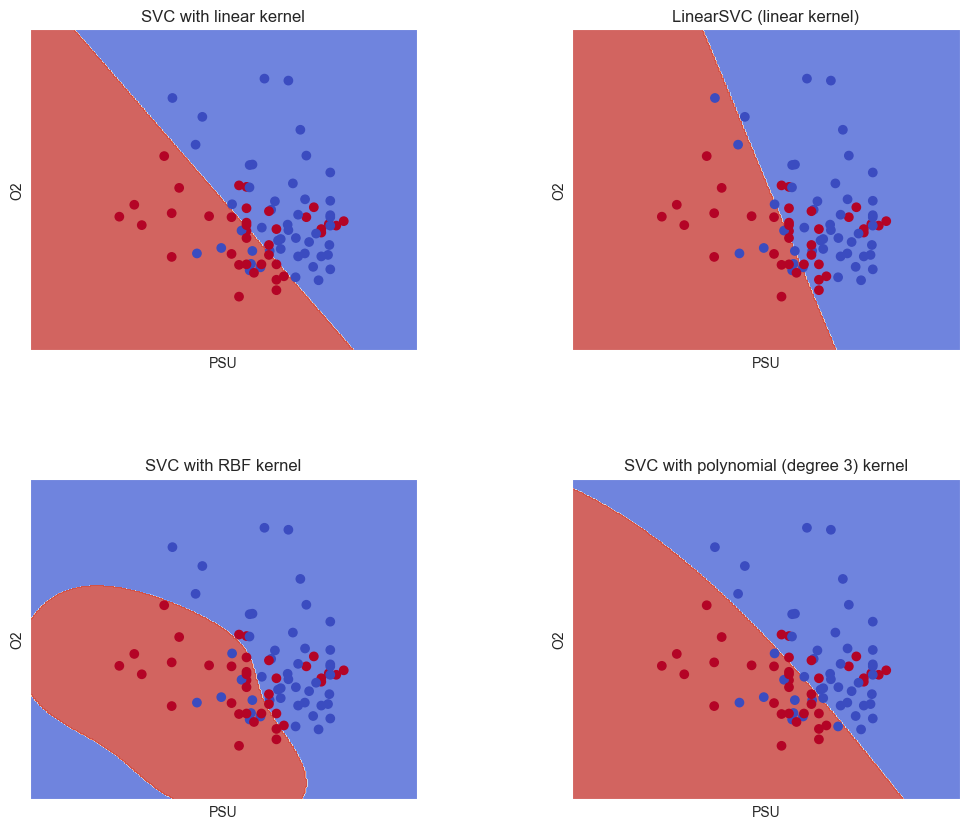

In [35]:
X = data[['PSU', 'O2']].values
y = data['Years'].values

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

C = 1.0  

svc = svm.SVC(kernel='linear', C=C).fit(train_x, train_y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(train_x, train_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(train_x, train_y)
lin_svc = svm.LinearSVC(C=C).fit(train_x, train_y)


h = .02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

titles = [
    'SVC with linear kernel',
    'LinearSVC (linear kernel)',
    'SVC with RBF kernel',
    'SVC with polynomial (degree 3) kernel'
]


plt.figure(figsize=(12, 10))

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap=plt.cm.coolwarm)
    plt.xlabel('PSU')
    plt.ylabel('O2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# 4. Naive Bayes
## Data loading

In [36]:
data = pd.read_csv("Vlagun_Phys_Years3.csv")

In [37]:
data.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Separation of independent variables (X) and dependent variable (Y)

In [38]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Data split ( 70% : 30% )

In [39]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

## Creation and training a naive bayes model

In [40]:
model = GaussianNB()
model.fit(train_x, train_y)

GaussianNB()

## Prediction on training and test sets

In [41]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

## Calculation accuracy

In [42]:
accuracy_train = accuracy_score(train_y, predict_train)
accuracy_test = accuracy_score(test_y, predict_test)

In [43]:
print("Accuracy on training set:", accuracy_train)

Accuracy on training set: 0.9404761904761905


In [44]:
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.8888888888888888


## Visualization

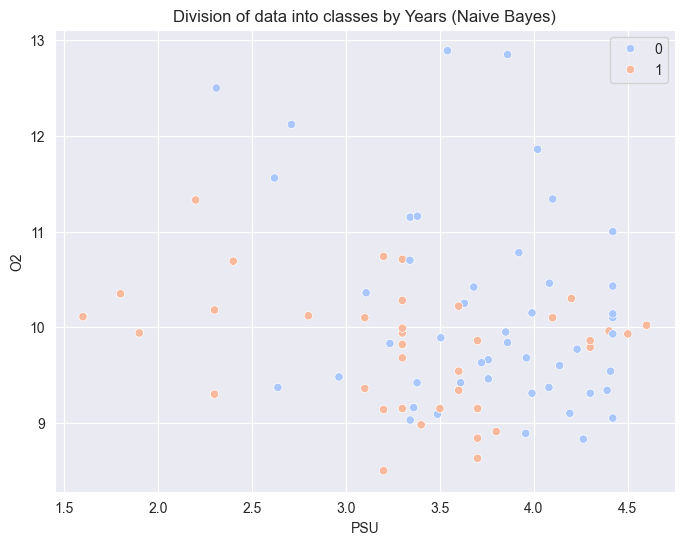

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_x[:, 0], y=train_x[:, 1], hue=train_y, palette="coolwarm")
plt.xlabel("PSU")
plt.ylabel("O2")
plt.title("Division of data into classes by Years (Naive Bayes)")
plt.show()

# 5. K-Nearest Neighbours
## Data loading

In [58]:
data = pd.read_csv("Vlagun_Phys_Years3.csv")

In [59]:
data.head()

,PSU,O2,temp.,SS,DOC,TPOC,Windspeedinsitu,Depth,Years
0,3.757624,9.46,18.3,52.0,7.500,8.5650,3.5,3.3,0
1,3.504707,9.89,19.1,50.0,7.860,8.5200,0.0,3.6,0
2,3.757624,9.66,18.1,59.0,8.172,8.4915,1.0,3.4,0
3,3.107266,10.36,19.5,46.0,7.848,8.8320,0.0,2.9,0
4,2.619498,11.56,19.0,42.0,7.536,9.2400,0.0,3.0,0


## Separation of independent variables (X) and dependent variable (Y)

In [60]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Data split ( 70% : 30% )

In [61]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

## Creation and training a knn model

In [62]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)

KNeighborsClassifier()

## Model parameters

In [63]:
print(f'The number of neigbours used to predict the target: {model.n_neighbors}')

The number of neigbours used to predict the target: 5


## Prediction on training and test sets

In [64]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

## Calculation of accuracy

In [65]:
accuracy_train = accuracy_score(train_y, predict_train)
accuracy_test = accuracy_score(test_y, predict_test)

In [66]:
print("Accuracy on training set:", accuracy_train)

Accuracy on training set: 0.9047619047619048


In [67]:
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.8611111111111112


## Visualization

In [70]:
selected_features = ["Windspeedinsitu", "DOC"]
X = data[selected_features].values
y = data["Years"].values

In [71]:
app = Dash(__name__)

app.layout = html.Div([
    html.H4('Explanatory k-NN plot'),
    dcc.Graph(id="graph"),
    html.P("Select number of neighbors:"),
    dcc.Slider(
        id='slider-neighbors',
        min=5, max=20, step=1, value=12,
        marks={i: str(i) for i in range(5,21,5)})
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider-neighbors", "value"))
def train_and_display_model(k):
    xrange, yrange = build_range(X, y)
    xx, yy = np.meshgrid(xrange, yrange)
    test_input = np.c_[xx.ravel(), yy.ravel()]

    clf = KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    Z = clf.predict_proba(test_input)[:, 1]
    Z = Z.reshape(xx.shape)
    fig = build_figure(X, y, Z, xrange, yrange)

    return fig


# ############ HELPER FUNCTIONS ############
def build_range(X, y, mesh_size=.02, margin=.25):
    """
    Create an x range and a y range for building meshgrid
    """
    x_min = X[:, 0].min() - margin
    x_max = X[:, 0].max() + margin
    y_min = X[:, 1].min() - margin
    y_max = X[:, 1].max() + margin

    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    return xrange, yrange


def build_figure(X, y, Z, xrange, yrange):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y.astype(str), test_size=0.25, random_state=0)

    trace_specs = [
        [X_train, y_train, '0', 'Train', 'square'],
        [X_train, y_train, '1', 'Train', 'circle'],
        [X_test, y_test, '0', 'Test', 'square-dot'],
        [X_test, y_test, '1', 'Test', 'circle-dot']
    ]

    fig = go.Figure(data=[
        go.Scatter(
            x=X[y==label, 0], y=X[y==label, 1],
            name=f'{split}, y={label}',
            mode='markers', marker_symbol=marker
        )
        for X, y, label, split, marker in trace_specs
    ])
    fig.update_traces(
        marker_size=12, marker_line_width=1.5,
        marker_color="lightyellow"
    )

    fig.add_trace(
        go.Contour(
            x=xrange, y=yrange, z=Z,
            showscale=False, colorscale='RdBu',
            opacity=0.4, name='Score', hoverinfo='skip'
        )
    )

    return fig



app.run_server(debug=True)

# 6. PCA
## Data loading

In [2]:
data = pd.read_csv("wine.csv")
data.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Separation of independent variables (X) and dependent variable (Y)

In [3]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Data split ( 70% : 30% )

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=7)

## Creation and training a linear regression model

In [5]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

## Prediction on training and test sets

In [6]:
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

In [7]:
print("Predicts (train): ", predict_train)

Predicts (train):  [2.05987805 2.01364783 2.08875605 1.07458972 2.80422656 0.88501062
 3.07791256 1.4569683  2.90301603 1.1236965  3.03062118 1.96753076
 1.88319303 1.9975679  0.98856614 1.85657848 1.4347571  0.80389607
 2.95474153 0.99128421 2.92428393 1.98768254 2.22774877 3.04929717
 2.25850489 0.88809858 1.73946825 1.73057303 1.76888273 1.93561329
 1.13315118 0.87687911 0.97687415 2.04721913 2.14212817 2.95834811
 2.07568034 1.2156004  1.95783936 2.58754255 1.56809235 2.19876319
 1.26909755 2.91272317 2.28253728 1.17081658 1.03641409 1.01896244
 0.3958699  2.18023597 1.97384671 1.13926437 1.88137038 1.34018817
 1.02789288 1.10204691 1.07759143 1.02078075 3.11448852 2.99329431
 1.47813739 0.67289769 1.01691161 2.82250925 1.01096604 1.13323476
 1.53986725 2.53806065 1.69738251 1.99623769 1.050338   1.20255683
 2.72575177 1.078692   2.46426054 3.02429058 3.0873531  1.86706954
 3.09076563 1.75114812 2.53580307 2.44992014 1.32119748 0.76171791
 2.888622   1.71539072 2.88117491 1.7310176

In [8]:
print("Predicts (test): ", predict_test)

Predicts (test):  [3.03087985 1.21189589 3.11016654 3.27421521 1.83403317 2.8811608
 1.93310778 1.03617427 1.68960822 2.48629876 0.81905106 1.80797968
 2.56588285 1.85102614 1.70065    2.06487088 1.41821331 3.06861062
 0.85892915 1.327699   1.94622622 1.39721401 2.09119539 2.4262726
 0.30316238 3.081598   2.12588628 2.8204082  3.02877977 2.60453551
 1.99861138 1.19619652 2.65725385 1.84536523 1.64423416 1.56647922
 2.58843655 2.80079268 1.12751068 2.91019165 1.34311227 1.35045987
 2.88430542 2.66255829 1.78899318 1.42247238 1.04498256 1.80960844
 2.07102212 1.61510867 1.68058343 1.32112209 0.76734295 1.19784482]


## Calculation of RMSE

In [9]:
rmse_train = mean_squared_error(train_y, predict_train) ** 0.5
rmse_test = mean_squared_error(test_y, predict_test) ** 0.5

In [10]:
print("RMSE (train):", rmse_train)
print("RMSE (test):", rmse_test)

RMSE (train): 0.23619215005996844
RMSE (test): 0.30745533550152543


## Creation of PCA object

In [11]:
model_pca = PCA(n_components=0.9)

In [12]:
new_train = model_pca.fit_transform(train_x)
new_test = model_pca.fit_transform(test_x)

In [13]:
print(f'Training model with {new_train.shape[1]} dimensions.')

Training model with 1 dimensions.


## Creation object of model

In [14]:
model_new = LinearRegression()
model_new.fit(new_train, train_y)

LinearRegression()

## Predict the target on the new train dataset and calculate RMSE

In [15]:
predict_train_pca = model_new.predict(new_train)
rmse_train_pca = mean_squared_error(train_y, predict_train_pca) ** 0.5
print(f'RMSE on new train dataset: {rmse_train_pca}')

RMSE on new train dataset: 0.5915629367830563


In [16]:
predict_test_pca = model_new.predict(new_test)
rmse_test_pca = mean_squared_error(test_y, predict_test_pca) ** 0.5
print(f'RMSE on new test dataset: {rmse_test_pca}')

RMSE on new test dataset: 0.63795193740365


## Standardizing the features

In [17]:
X = StandardScaler().fit_transform(X)

## Fit PCA and transform X

In [18]:
pca = PCA(n_components=0.9)
pca.fit(X)
print(f'Variance explained by the principal component (in decreasing order): {pca.explained_variance_ratio_}')

Variance explained by the principal component (in decreasing order): [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749]


In [19]:
X1 = pca.transform(X)

In [20]:
print(f'Shape of transformed X: {X1.shape}')

Shape of transformed X: (178, 8)


## Visualization (had problems with plotly express)

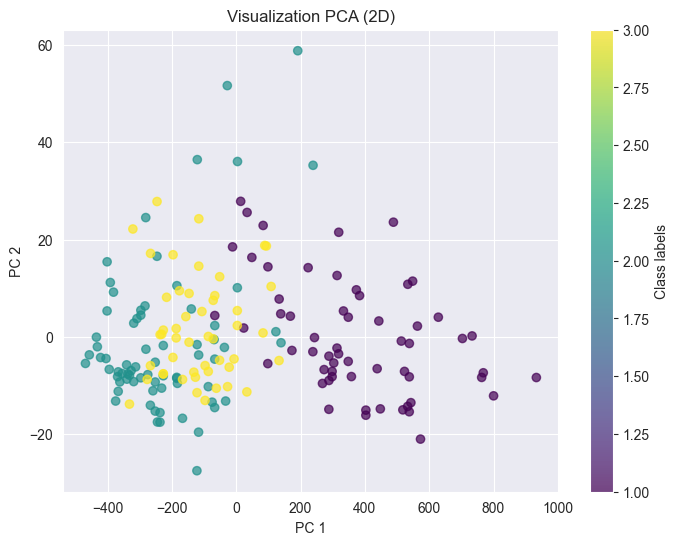

In [29]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)  # 2D
plt.colorbar(scatter, label="Class labels")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("Visualization PCA (2D)")
plt.grid(True)

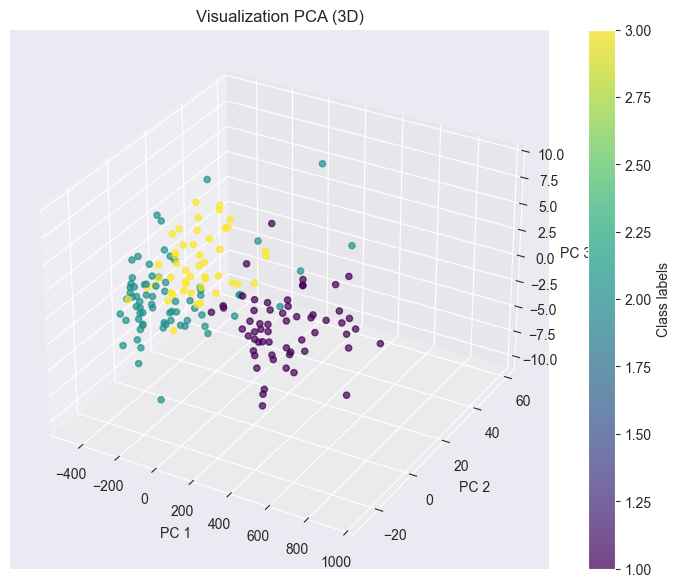

In [30]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', alpha=0.7)  # 3D
fig.colorbar(scatter, ax=ax, label="Class labels")

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("Visualization PCA (3D)")
plt.show()